In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
filepath = os.path.join("data_output","df_meetup_cities.csv")

In [4]:
df_members = pd.read_csv(filepath)

In [5]:
df_members.head()

,city,country,country_params,distance,id,lat,localized_country_name,lon,member_count,ranking,state,state_params,zip
0,Birmingham,us,US,664.785519,35201,33.520000,USA,-86.809998,6151,0,AL,AL,35201
1,Huntsville,us,US,701.452673,35801,34.730000,USA,-86.570000,4475,1,AL,AL,35801
2,Mobile,us,US,573.178832,36601,30.700001,USA,-88.050003,2242,2,AL,AL,36601
3,Montgomery,us,US,678.186476,36101,32.400002,USA,-86.330002,1677,3,AL,AL,36101
4,Madison,us,US,685.171709,35756,34.580002,USA,-86.820000,1041,4,AL,AL,35756


In [7]:
df_members['member_count'].max()

229371

In [10]:
bins = [0, 1000, 5000, 25000,100000,250000]
group_names = ['0-1000', '1000-5000', '5000-25000','25000-100000','100000-250000']
df_members['categories'] = pd.cut(df_members['member_count'], bins, labels=group_names)

In [11]:
df_members.head()

,city,country,country_params,distance,id,lat,localized_country_name,lon,member_count,ranking,state,state_params,zip,categories
0,Birmingham,us,US,664.785519,35201,33.520000,USA,-86.809998,6151,0,AL,AL,35201,5000-25000
1,Huntsville,us,US,701.452673,35801,34.730000,USA,-86.570000,4475,1,AL,AL,35801,1000-5000
2,Mobile,us,US,573.178832,36601,30.700001,USA,-88.050003,2242,2,AL,AL,36601,1000-5000
3,Montgomery,us,US,678.186476,36101,32.400002,USA,-86.330002,1677,3,AL,AL,36101,1000-5000
4,Madison,us,US,685.171709,35756,34.580002,USA,-86.820000,1041,4,AL,AL,35756,1000-5000


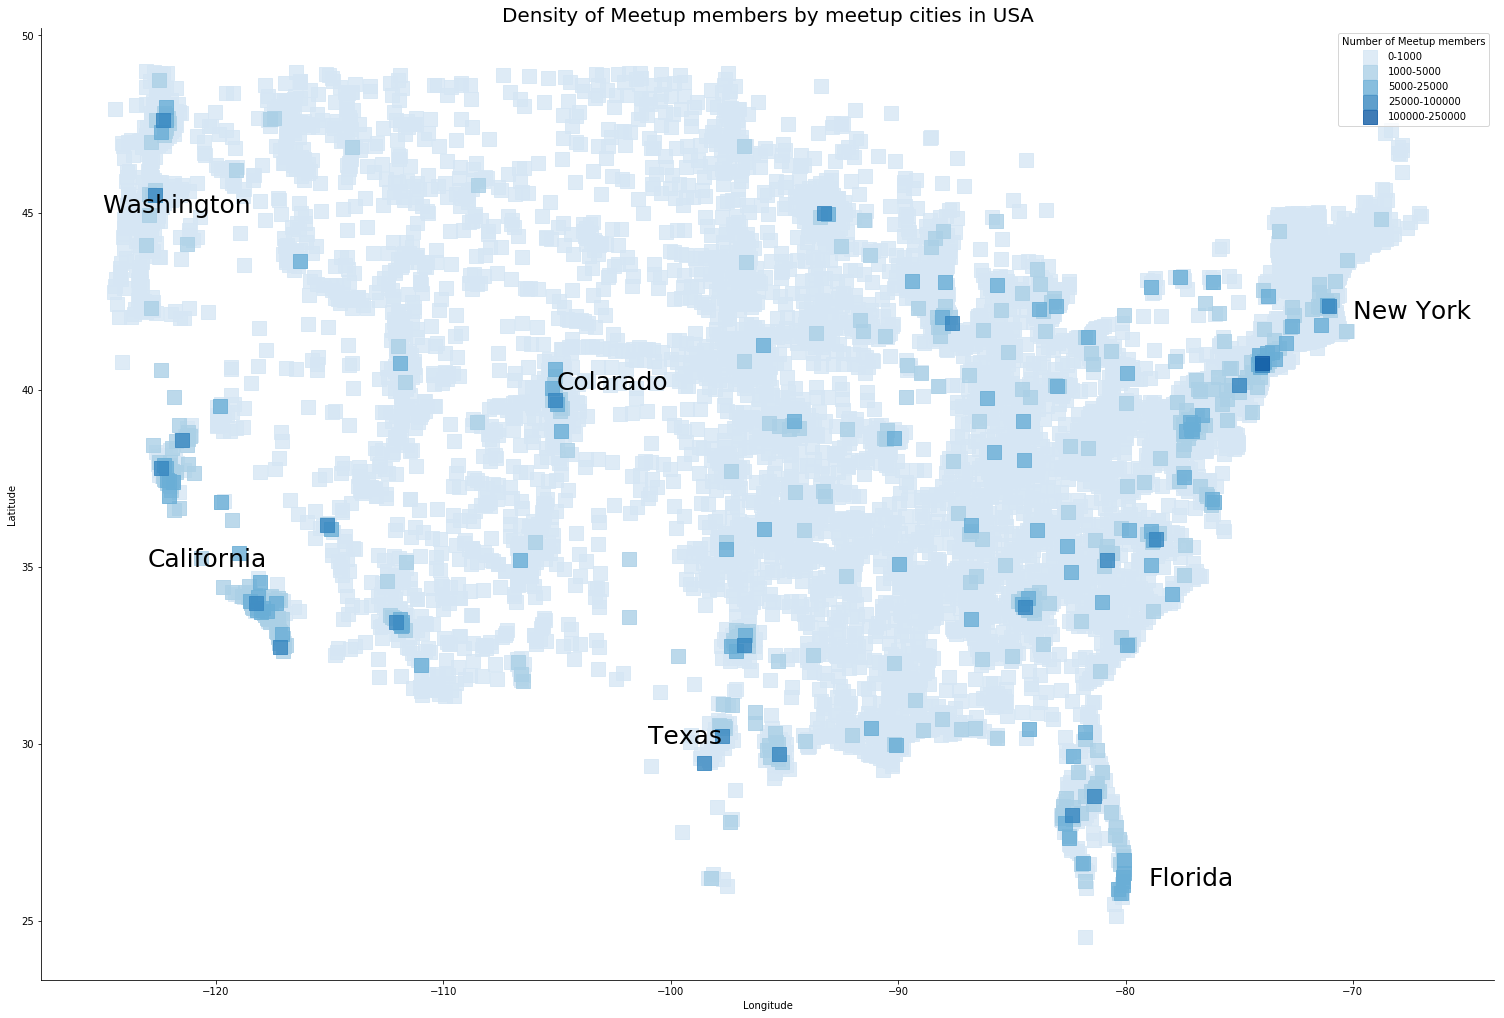

In [95]:
# plot the Meetup cities

sns.lmplot("lon", "lat",data=df_members,fit_reg=False,size=14,aspect=1.5,hue='categories',palette="Blues",
          scatter_kws={"s": 200},legend_out=False,markers='s')
plt.title('Density of Meetup members by meetup cities in USA',fontdict={'fontsize':20})

plt.legend(prop={'size': 10},title='Number of Meetup members')

plt.annotate('Florida', xy=(-79, 26),size=25)
plt.annotate('New York', xy=(-70, 42),size=25)
plt.annotate('Texas', xy=(-101, 30),size=25)
plt.annotate('California', xy=(-123, 35),size=25)
plt.annotate('Colarado', xy=(-105, 40),size=25)
plt.annotate('Washington', xy=(-125, 45),size=25)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig('data_images/plot1_meetup members by cities.png',bbox_inches='tight')
plt.show();